In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from config import db_password
import psycopg2 as ps
pd.set_option("display.max_columns", None)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_records.csv')

In [3]:
df.head()

,Unnamed: 0,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Age,Breed_intake,Color_intake,Name_outcome,DateTime_outcome,MonthYear_outcome,Outcome_Type,Outcome_Subtype,Sex_upon_Outcome,Age_upon_Outcome,gender_intake,gender_outcome,fixed_intake,fixed_outcome,fixed_changed,Age_Bucket,retriever,shepherd,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length
0,0,A730601,NaN,2016-07-07 12:11:00,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,NaN,2016-07-08 09:00:00,07/08/2016 09:00:00 AM,Transfer,SCRP,Neutered Male,7 months,Male,Male,Intact,Neutered,1,7-12 months,0,0,0,0,0,0,0,0,0,0,0 days 20:49:00.000000000,0-7 days
1,1,A683644,*Zoey,2014-07-13 11:02:00,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White,*Zoey,2014-11-06 10:06:00,11/06/2014 10:06:00 AM,Adoption,Foster,Spayed Female,4 months,Female,Female,Intact,Spayed,1,1-6 weeks,0,0,0,0,0,0,0,0,0,0,115 days 23:04:00.000000000,12 weeks - 6 months
2,2,A676515,Rico,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Pit Bull Mix,White/Brown,Rico,2014-04-14 18:38:00,04/14/2014 06:38:00 PM,Return to Owner,NaN,Neutered Male,3 months,Male,Male,Intact,Neutered,1,1-6 months,0,0,0,0,0,0,0,0,0,1,3 days 09:53:00.000000000,0-7 days
3,3,A742953,NaN,2017-01-31 13:30:00,01/31/2017 01:30:00 PM,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Saluki,Sable/Cream,NaN,2017-02-04 14:17:00,02/04/2017 02:17:00 PM,Transfer,Partner,Intact Male,2 years,Male,Male,Intact,Intact,0,1-3 years,0,0,0,0,0,0,0,0,0,0,4 days 00:47:00.000000000,0-7 days
4,4,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,*Gilbert,2014-06-16 13:54:00,06/16/2014 01:54:00 PM,Transfer,Partner,Neutered Male,2 months,Male,Male,Intact,Neutered,1,1-6 months,0,0,0,0,0,0,0,0,0,0,24 days 22:11:00.000000000,3-6 weeks


In [4]:
# Check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76977 entries, 0 to 76976
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          76977 non-null  int64 
 1   Animal ID           76977 non-null  object
 2   Name_intake         57493 non-null  object
 3   DateTime_intake     76977 non-null  object
 4   MonthYear_intake    76977 non-null  object
 5   Found_Location      76977 non-null  object
 6   Intake_Type         76977 non-null  object
 7   IntakeCondition     76977 non-null  object
 8   Animal_Type_intake  76977 non-null  object
 9   Sex                 76976 non-null  object
 10  Age                 76977 non-null  object
 11  Breed_intake        76977 non-null  object
 12  Color_intake        76977 non-null  object
 13  Name_outcome        57493 non-null  object
 14  DateTime_outcome    76977 non-null  object
 15  MonthYear_outcome   76977 non-null  object
 16  Outcome_Type        76

In [5]:
# Dataframe null values
df.isnull().sum()

Unnamed: 0                0
Animal ID                 0
Name_intake           19484
DateTime_intake           0
MonthYear_intake          0
Found_Location            0
Intake_Type               0
IntakeCondition           0
Animal_Type_intake        0
Sex                       1
Age                       0
Breed_intake              0
Color_intake              0
Name_outcome          19484
DateTime_outcome          0
MonthYear_outcome         0
Outcome_Type              7
Outcome_Subtype       45254
Sex_upon_Outcome          4
Age_upon_Outcome         21
gender_intake          5608
gender_outcome         5611
fixed_intake              1
fixed_outcome             4
fixed_changed             0
Age_Bucket                0
retriever                 0
shepherd                  0
beagle                    0
terrier                   0
boxer                     0
poodle                    0
rottweiler                0
dachshund                 0
chihuahua                 0
pit bull            

In [6]:
# Drop unnecessary columns
# Drop all single breed type column since we need to do our own encoding for breed_intake
df=df.drop(columns=['Unnamed: 0','Name_outcome','MonthYear_intake','MonthYear_outcome',
                    'gender_intake','gender_outcome','fixed_intake','fixed_outcome','Days_length',
                   'retriever','shepherd','beagle','terrier','boxer','poodle','rottweiler','dachshund','chihuahua',
                   'pit bull','Age','Age_upon_Outcome', 'DateTime_length'])
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Outcome_Subtype,Sex_upon_Outcome,fixed_changed,Age_Bucket
0,A730601,NaN,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,SCRP,Neutered Male,1,7-12 months
1,A683644,*Zoey,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Foster,Spayed Female,1,1-6 weeks
2,A676515,Rico,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,NaN,Neutered Male,1,1-6 months
3,A742953,NaN,2017-01-31 13:30:00,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Partner,Intact Male,0,1-3 years
4,A679549,*Gilbert,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Partner,Neutered Male,1,1-6 months


## Remove Duplicates

In [7]:
# Check for duplicates rows
count=0
for i in df['Animal ID'].duplicated():
    if i is True:
        count+=1
count

19762

In [8]:
# Drop duplicates
df=df.drop_duplicates(subset='Animal ID')

## Name_intake_column

In [9]:
# Change Name_Intake to bindary Yes or No
df.Name_intake = df.Name_intake.apply(lambda x: 'No' if pd.isnull(x) else 'Yes')
df.Name_intake.value_counts()

Yes    38274
No     18941
Name: Name_intake, dtype: int64

## Outcome Subtype

In [10]:
# Review values in Outcome_subtype
df.Outcome_Subtype.value_counts()

Partner                15368
Foster                  4040
SCRP                    3090
Suffering               2134
Rabies Risk             2024
Aggressive               416
In Kennel                273
Offsite                  244
Medical                  205
In Foster                128
Behavior                 124
Enroute                   30
At Vet                    27
Underage                  26
Court/Investigation       11
In Surgery                11
Possible Theft             5
Barn                       3
Name: Outcome_Subtype, dtype: int64

In [11]:
# create pivot table of Outcome and Subtype
outcome_df = df[['Outcome_Type', 'Outcome_Subtype']]
outcome_df = outcome_df.pivot_table(index='Outcome_Subtype', columns='Outcome_Type', aggfunc=len, fill_value=0)
outcome_df

Outcome_Type,Adoption,Died,Euthanasia,Missing,Transfer
Outcome_Subtype,,,,,
Aggressive,0,0,416,0,0
At Vet,0,25,2,0,0
Barn,1,0,0,0,2
Behavior,0,0,124,0,0
Court/Investigation,0,0,11,0,0
Enroute,0,30,0,0,0
Foster,4040,0,0,0,0
In Foster,0,113,0,15,0
In Kennel,0,266,0,7,0


In [12]:
df.isnull().sum()

Animal ID                 0
Name_intake               0
DateTime_intake           0
Found_Location            0
Intake_Type               0
IntakeCondition           0
Animal_Type_intake        0
Sex                       1
Breed_intake              0
Color_intake              0
DateTime_outcome          0
Outcome_Type              7
Outcome_Subtype       29056
Sex_upon_Outcome          4
fixed_changed             0
Age_Bucket                0
dtype: int64

In [13]:
# Drop Outcome_Subtype b/c so many null values and frop other null value rows
df=df.drop('Outcome_Subtype', axis=1)
df=df.dropna()

In [14]:
df.isnull().sum()

Animal ID             0
Name_intake           0
DateTime_intake       0
Found_Location        0
Intake_Type           0
IntakeCondition       0
Animal_Type_intake    0
Sex                   0
Breed_intake          0
Color_intake          0
DateTime_outcome      0
Outcome_Type          0
Sex_upon_Outcome      0
fixed_changed         0
Age_Bucket            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57206 entries, 0 to 76975
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Animal ID           57206 non-null  object
 1   Name_intake         57206 non-null  object
 2   DateTime_intake     57206 non-null  object
 3   Found_Location      57206 non-null  object
 4   Intake_Type         57206 non-null  object
 5   IntakeCondition     57206 non-null  object
 6   Animal_Type_intake  57206 non-null  object
 7   Sex                 57206 non-null  object
 8   Breed_intake        57206 non-null  object
 9   Color_intake        57206 non-null  object
 10  DateTime_outcome    57206 non-null  object
 11  Outcome_Type        57206 non-null  object
 12  Sex_upon_Outcome    57206 non-null  object
 13  fixed_changed       57206 non-null  int64 
 14  Age_Bucket          57206 non-null  object
dtypes: int64(1), object(14)
memory usage: 7.0+ MB


## Outcome_Type column

In [16]:
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket
0,A730601,No,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months
1,A683644,Yes,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks
2,A676515,Yes,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months
3,A742953,No,2017-01-31 13:30:00,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years
4,A679549,Yes,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months


In [17]:
df.Outcome_Type.value_counts()

Adoption           22988
Transfer           18460
Return to Owner     9806
Euthanasia          5100
Died                 533
Disposal             254
Missing               37
Rto-Adopt             15
Relocate              13
Name: Outcome_Type, dtype: int64

In [18]:
# Combine Died & Disposal Outcomes
df.loc[df.Outcome_Type == 'Disposal', 'Outcome_Type'] = 'Died'
df.Outcome_Type.value_counts()

Adoption           22988
Transfer           18460
Return to Owner     9806
Euthanasia          5100
Died                 787
Missing               37
Rto-Adopt             15
Relocate              13
Name: Outcome_Type, dtype: int64

In [19]:
# Combine Transfer & Relocate Outcomes
df.loc[df.Outcome_Type == 'Relocate', 'Outcome_Type'] = 'Transfer'
df.Outcome_Type.value_counts()

Adoption           22988
Transfer           18473
Return to Owner     9806
Euthanasia          5100
Died                 787
Missing               37
Rto-Adopt             15
Name: Outcome_Type, dtype: int64

In [20]:
# Combine Rto-Adopt & Return to Owner
df.loc[df.Outcome_Type == 'Rto-Adopt', 'Outcome_Type'] = 'Return to Owner'
df.Outcome_Type.value_counts()

Adoption           22988
Transfer           18473
Return to Owner     9821
Euthanasia          5100
Died                 787
Missing               37
Name: Outcome_Type, dtype: int64

In [21]:
# Drop Missing as low number and undetermined what this category is
df.drop(df[df['Outcome_Type'] == 'Missing'].index, inplace=True)

## DateTime_intake column

In [22]:
# Update DateTime_intake to datatime datatype
df.DateTime_intake = pd.to_datetime(df.DateTime_intake, format='%Y-%m-%d')
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket
0,A730601,No,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months
1,A683644,Yes,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks
2,A676515,Yes,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months
3,A742953,No,2017-01-31 13:30:00,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years
4,A679549,Yes,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months


## DateTime_outcome column

In [23]:
# Update DateTime_outcome to datatime datatype
df.DateTime_outcome = pd.to_datetime(df.DateTime_outcome, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57169 entries, 0 to 76975
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Animal ID           57169 non-null  object        
 1   Name_intake         57169 non-null  object        
 2   DateTime_intake     57169 non-null  datetime64[ns]
 3   Found_Location      57169 non-null  object        
 4   Intake_Type         57169 non-null  object        
 5   IntakeCondition     57169 non-null  object        
 6   Animal_Type_intake  57169 non-null  object        
 7   Sex                 57169 non-null  object        
 8   Breed_intake        57169 non-null  object        
 9   Color_intake        57169 non-null  object        
 10  DateTime_outcome    57169 non-null  datetime64[ns]
 11  Outcome_Type        57169 non-null  object        
 12  Sex_upon_Outcome    57169 non-null  object        
 13  fixed_changed       57169 non-null  int64     

## Create length of stay column

In [24]:
# Create a new column and calculate the length of stay in days
df['length_of_stay'] = df.DateTime_outcome - df.DateTime_intake
df['length_of_stay'] = df.length_of_stay / np.timedelta64(1, 'D')

<AxesSubplot:xlabel='length_of_stay', ylabel='Density'>

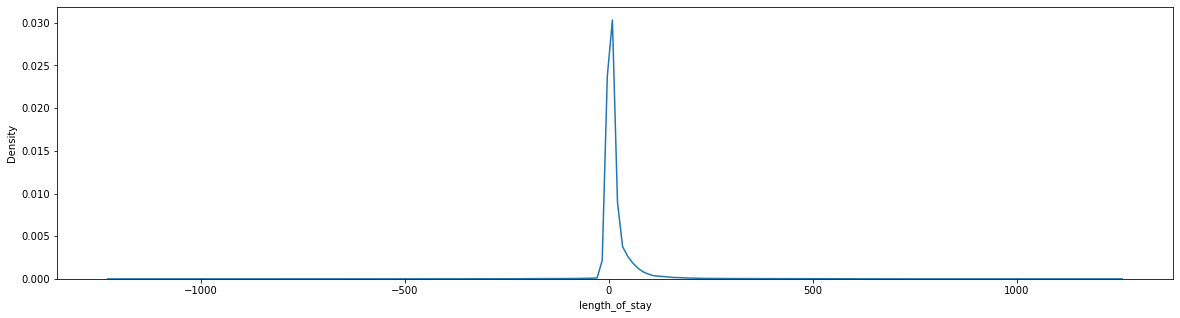

In [25]:
# Check values for datetime_length column
plt.figure(figsize=(20,5))
sns.kdeplot(x = df.length_of_stay)

In [26]:
# Delete all negative length of stay rows
df.drop(df[df['length_of_stay'] < 0].index, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55771 entries, 0 to 76975
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Animal ID           55771 non-null  object        
 1   Name_intake         55771 non-null  object        
 2   DateTime_intake     55771 non-null  datetime64[ns]
 3   Found_Location      55771 non-null  object        
 4   Intake_Type         55771 non-null  object        
 5   IntakeCondition     55771 non-null  object        
 6   Animal_Type_intake  55771 non-null  object        
 7   Sex                 55771 non-null  object        
 8   Breed_intake        55771 non-null  object        
 9   Color_intake        55771 non-null  object        
 10  DateTime_outcome    55771 non-null  datetime64[ns]
 11  Outcome_Type        55771 non-null  object        
 12  Sex_upon_Outcome    55771 non-null  object        
 13  fixed_changed       55771 non-null  int64     

In [28]:
df.head(10)

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket,length_of_stay
0,A730601,No,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,0.867361
1,A683644,Yes,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks,115.961111
2,A676515,Yes,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,3.411806
3,A742953,No,2017-01-31 13:30:00,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years,4.032639
4,A679549,Yes,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,24.924306
5,A683798,Yes,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,Domestic Medium Hair Mix,White/Black,2016-10-18 10:55:00,Adoption,Spayed Female,0,1-3 years,88.943750
9,A683656,No,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,Snowshoe Mix,Lynx Point,2014-07-17 16:57:00,Adoption,Neutered Male,1,1-6 months,4.150694
10,A709749,Yes,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Calico,2015-09-22 12:49:00,Transfer,Spayed Female,1,1-3 years,40.763889
11,A692161,Yes,2014-11-15 15:18:00,Avenue G/42Nd in Austin (TX),Owner Surrender,Normal,Dog,Intact Male,Pit Bull Mix,Brown/White,2014-11-21 18:55:00,Adoption,Neutered Male,1,1-6 months,6.150694
12,A733551,Yes,2016-08-23 14:35:00,183 And Cameron in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,2016-09-01 00:00:00,Transfer,Intact Male,0,1-6 months,8.392361


## Intake condition column

In [29]:
df.IntakeCondition.value_counts()

Normal      48301
Injured      3020
Sick         2454
Nursing      1520
Aged          250
Other         112
Feral          72
Pregnant       42
Name: IntakeCondition, dtype: int64

In [30]:
# Combine Injured and Sick for Intake Condition
df.loc[(df.IntakeCondition == 'Injured') | (df.IntakeCondition == 'Sick'), 'IntakeCondition'] = 'Medical'
df.IntakeCondition.value_counts()

Normal      48301
Medical      5474
Nursing      1520
Aged          250
Other         112
Feral          72
Pregnant       42
Name: IntakeCondition, dtype: int64

In [31]:
# Combine Pregnant and Nursing for  IntakeCondition
df.loc[(df.IntakeCondition == 'Nursing') | (df.IntakeCondition == 'Pregnant'), 'IntakeCondition' ] = 'Maternity'
df.IntakeCondition.value_counts()

Normal       48301
Medical       5474
Maternity     1562
Aged           250
Other          112
Feral           72
Name: IntakeCondition, dtype: int64

## Animal_Type_intake column

In [32]:
df.Animal_Type_intake.value_counts()

Dog          30030
Cat          22035
Other         3449
Bird           249
Livestock        8
Name: Animal_Type_intake, dtype: int64

In [33]:
# Combine Livestock with Other for Animal_Type_intake
df.loc[(df.Animal_Type_intake == 'Livestock'), 'Animal_Type_intake'] = 'Other'
df.Animal_Type_intake.value_counts()

Dog      30030
Cat      22035
Other     3457
Bird       249
Name: Animal_Type_intake, dtype: int64

## Sex column

In [34]:
df.Sex.value_counts()

Intact Male      18768
Intact Female    17695
Neutered Male     7300
Spayed Female     6471
Unknown           5537
Name: Sex, dtype: int64

In [35]:
df.rename(columns={'Sex': 'Sex_Intake'}, inplace=True)

## Sex_upon_Outcome

In [36]:
df.Sex_upon_Outcome.value_counts()

Neutered Male    18903
Spayed Female    17191
Intact Male       7165
Intact Female     6975
Unknown           5537
Name: Sex_upon_Outcome, dtype: int64

## Found_Location column

In [37]:
counts=df['Found_Location'].value_counts()
counts

Austin (TX)                                  8889
Travis (TX)                                   587
7201 Levander Loop in Austin (TX)             406
Del Valle (TX)                                275
Outside Jurisdiction                          271
                                             ... 
15201 Thatcher Dr in Austin (TX)                1
Ponder Ln And Citation Ave in Travis (TX)       1
6405 Hergotz in Austin (TX)                     1
11512 Travis St in Jonestown (TX)               1
Spur And Tanney in Austin (TX)                  1
Name: Found_Location, Length: 27053, dtype: int64

In [38]:
# Find all addresses with street values
new_location=[]
for i in df['Found_Location']:
    if ' in' in i and i.split()[0].isdigit() == True:
            i=i
    else:
        i=np.nan
    new_location.append(i)

In [39]:
new_location

['1109 Shady Ln in Austin (TX)',
 nan,
 '615 E. Wonsley in Austin (TX)',
 nan,
 '124 W Anderson in Austin (TX)',
 '3118 Windsor Rd in Austin (TX)',
 '8238 Research Blvd in Austin (TX)',
 '4800 Weletka Dr in Austin (TX)',
 nan,
 '183 And Cameron in Austin (TX)',
 '6808 S Ih 35 Frontage Rd in Austin (TX)',
 '8413 Danville Dr in Austin (TX)',
 '11602 Gunsmoke Circle in Austin (TX)',
 '2940 Eckert St in Austin (TX)',
 nan,
 nan,
 nan,
 '1506 Thorneridge Road in Austin (TX)',
 nan,
 '1830 W Rundberg Ln in Austin (TX)',
 nan,
 nan,
 '9308 N Lamar in Austin (TX)',
 nan,
 nan,
 '1128 Spur in Austin (TX)',
 nan,
 '12505 Rampart St in Austin (TX)',
 '4502 Hudson Bend Rd in Travis (TX)',
 nan,
 '609 W Lynn St #1 in Austin (TX)',
 '704 Hyde Park Ct in Austin (TX)',
 '13096 N 183 in Austin (TX)',
 '701 W Longspur in Austin (TX)',
 nan,
 nan,
 '2203 Singletree Ave in Austin (TX)',
 nan,
 '11417 Trails End in Travis (TX)',
 nan,
 '7607 Glen Hill Cove in Austin (TX)',
 '2202 Galway St in Austin (TX)',

In [40]:
df['Found_Location']=new_location

In [41]:
df[["found_address", "found_city"]]= df["Found_Location"].str.split(" in", expand = True)
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex_Intake,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket,length_of_stay,found_address,found_city
0,A730601,No,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,0.867361,1109 Shady Ln,Austin (TX)
1,A683644,Yes,2014-07-13 11:02:00,NaN,Owner Surrender,Maternity,Dog,Intact Female,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks,115.961111,NaN,NaN
2,A676515,Yes,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,3.411806,615 E. Wonsley,Austin (TX)
3,A742953,No,2017-01-31 13:30:00,NaN,Stray,Normal,Dog,Intact Male,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years,4.032639,NaN,NaN
4,A679549,Yes,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,24.924306,124 W Anderson,Austin (TX)


In [42]:
df['Found_Location'] = df['found_address'] + ', ' + df['found_city']
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex_Intake,Breed_intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket,length_of_stay,found_address,found_city
0,A730601,No,2016-07-07 12:11:00,"1109 Shady Ln, Austin (TX)",Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,0.867361,1109 Shady Ln,Austin (TX)
1,A683644,Yes,2014-07-13 11:02:00,NaN,Owner Surrender,Maternity,Dog,Intact Female,Border Collie Mix,Brown/White,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks,115.961111,NaN,NaN
2,A676515,Yes,2014-04-11 08:45:00,"615 E. Wonsley, Austin (TX)",Stray,Normal,Dog,Intact Male,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,3.411806,615 E. Wonsley,Austin (TX)
3,A742953,No,2017-01-31 13:30:00,NaN,Stray,Normal,Dog,Intact Male,Saluki,Sable/Cream,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years,4.032639,NaN,NaN
4,A679549,Yes,2014-05-22 15:43:00,"124 W Anderson, Austin (TX)",Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,24.924306,124 W Anderson,Austin (TX)


In [43]:
df.drop(['found_city', 'found_address'], axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55771 entries, 0 to 76975
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Animal ID           55771 non-null  object        
 1   Name_intake         55771 non-null  object        
 2   DateTime_intake     55771 non-null  datetime64[ns]
 3   Found_Location      33587 non-null  object        
 4   Intake_Type         55771 non-null  object        
 5   IntakeCondition     55771 non-null  object        
 6   Animal_Type_intake  55771 non-null  object        
 7   Sex_Intake          55771 non-null  object        
 8   Breed_intake        55771 non-null  object        
 9   Color_intake        55771 non-null  object        
 10  DateTime_outcome    55771 non-null  datetime64[ns]
 11  Outcome_Type        55771 non-null  object        
 12  Sex_upon_Outcome    55771 non-null  object        
 13  fixed_changed       55771 non-null  int64     

## Age Bucket column

In [45]:
df.Age_Bucket.value_counts()

1-3 years           22087
1-6 months          14250
1-6 weeks            6342
4-6 years            5503
7+ years             3798
7-12 months          2617
Less than 1 week     1174
Name: Age_Bucket, dtype: int64

## Intake_Type column

In [46]:
df.Intake_Type.value_counts()

Stray                 40529
Owner Surrender        9074
Public Assist          3188
Wildlife               2749
Euthanasia Request      231
Name: Intake_Type, dtype: int64

## Breed_Intake column

In [47]:
count_breed=df.Breed_intake.value_counts()
count_breed

Domestic Shorthair Mix                     17501
Pit Bull Mix                                3786
Chihuahua Shorthair Mix                     3447
Labrador Retriever Mix                      2949
Domestic Medium Hair Mix                    1723
                                           ...  
Yorkshire Terrier/Chinese Crested              1
Boykin Span                                    1
Blue Lacy/Great Dane                           1
Cardigan Welsh Corgi/Labrador Retriever        1
Anatol Shepherd/Collie Rough                   1
Name: Breed_intake, Length: 1928, dtype: int64

In [48]:
for i in count_breed.index.tolist():
    print(i)

Domestic Shorthair Mix
Pit Bull Mix
Chihuahua Shorthair Mix
Labrador Retriever Mix
Domestic Medium Hair Mix
German Shepherd Mix
Bat Mix
Domestic Longhair Mix
Siamese Mix
Australian Cattle Dog Mix
Bat
Dachshund Mix
Miniature Poodle Mix
Border Collie Mix
Boxer Mix
Raccoon Mix
Australian Shepherd Mix
Rat Terrier Mix
Jack Russell Terrier Mix
Domestic Shorthair
Catahoula Mix
Yorkshire Terrier Mix
Miniature Schnauzer Mix
Chihuahua Longhair Mix
Beagle Mix
Siberian Husky Mix
Cairn Terrier Mix
Great Pyrenees Mix
Rottweiler Mix
Rabbit Sh Mix
Shih Tzu Mix
Pointer Mix
American Bulldog Mix
Chihuahua Shorthair/Dachshund
Raccoon
Staffordshire Mix
Australian Kelpie Mix
Plott Hound Mix
Black Mouth Cur Mix
Chihuahua Shorthair
Pit Bull
Labrador Retriever
Labrador Retriever/Pit Bull
American Staffordshire Terrier Mix
Anatol Shepherd Mix
Opossum Mix
Dachshund/Chihuahua Shorthair
German Shepherd
Snowshoe Mix
Golden Retriever Mix
Queensland Heeler Mix
Miniature Pinscher Mix
Maltese Mix
Chow Chow Mix
Domestic

Labrador Retriever/Whippet
Labrador Retriever/Collie Smooth
Coton De Tulear Mix
Japanese Chin Mix
Pigeon
Doberman Pinsch/Labrador Retriever
Labrador Retriever/Black Mouth Cur
Pomeranian/Chihuahua Shorthair
Exotic Shorthair Mix
Chihuahua Longhair/Jack Russell Terrier
Labrador Retriever/Chesa Bay Retr
Australian Cattle Dog/Chow Chow
Great Pyrenees/Pointer
Chihuahua Shorthair/Smooth Fox Terrier
Quaker Mix
Sparrow Mix
Finnish Spitz
Border Collie/Catahoula
Lop-Mini
Beagle/Jack Russell Terrier
Dachshund Wirehair/Toy Poodle
Rat Terrier/Cardigan Welsh Corgi
Boxer/Black Mouth Cur
American Bulldog/Boxer
Norwegian Forest Cat Mix
Manchester Terrier/Jack Russell Terrier
Golden Retriever/Border Collie
Border Terrier
Dachshund/Bloodhound
Abyssinian Mix
Queensland Heeler/Chihuahua Shorthair
Australian Kelpie/Blue Lacy
Golden Retriever/German Shepherd
Great Pyrenees/Australian Cattle Dog
Parrot Mix
Boxer/Great Dane
Basenji/Chihuahua Shorthair
Australian Kelpie/Pit Bull
Rat Terrier/Miniature Poodle
Blue

Cairn Terrier/Shih Tzu
Mastiff/Dutch Shepherd
Pit Bull/American Foxhound
Siberian Husky/Chinese Sharpei
Snowshoe/Domestic Shorthair
Australian Cattle Dog/Chinese Crested
Pembroke Welsh Corgi/Chihuahua Longhair
Pembroke Welsh Corgi/Pit Bull
Chihuahua Shorthair/Lhasa Apso
Dutch Shepherd/Boxer
St. Bernard Rough Coat/Labrador Retriever
Australian Kelpie/Finnish Spitz
Chinese Sharpei/Rat Terrier
German Shorthair Pointer/Australian Cattle Dog
Chihuahua Shorthair/Shih Tzu
Labrador Retriever/St. Bernard Smooth Coat
Plott Hound/German Shepherd
Jindo/Labrador Retriever
Blue Lacy/Collie Smooth
Dachshund/Swedish Vallhund
Cairn Terrier/Italian Greyhound
Boston Terrier/Pembroke Welsh Corgi
Pointer/Australian Kelpie
Shetland Sheepdog/Cardigan Welsh Corgi
St. Bernard Rough Coat/Boxer
Collie Smooth/Miniature Poodle
Border Collie/Brittany
Havana Brown Mix
Pit Bull/Bull Terrier
Chow Chow/Pomeranian
Heron
Cairn Terrier/Scottish Terrier
St. Bernard Rough Coat/Standard Schnauzer
Dachshund Wirehair/Standard 

In [49]:
# classify breed types into categories
new_breed=[]
for i in df['Breed_intake']:
    if 'Chihuahua' in i:
        i = 'Chihuahua'
    elif 'Retriever' in i or i=='Chesa Bay Retr':
        i = 'Retriever Breeds'
    elif i=='Shih Tzu' or i=='Miniature Poodle' or i=='Miniature Schnauzer' or i=='Maltese' or i=='Pomeranian' or i=='Lhasa Apso' or i=='Toy Poodle' or i=='Pekingese' or i=='Bichon Frise' or i=='Cavalier Span' or i=='West Highland' or i=='Papillon' or i=='Havanese' or i=='Japanese Chin' or i=='Dandie Dinmont' or i=='Bruss Griffon' or i=='Coton De Tulear' or 'Dachshund' in i or i=='French Bulldog' or i=='Pug' or i=='Miniature Pinscher' or i=='Pbgv':
        i = 'Small Dogs'
    elif 'Bull' in i or 'Staffordshire' in i or i=='Chinese Sharpei' or i=='Dogo Argentino' or i=='Boxer':
        i = 'Bully Dogs'
    elif 'Terrier' in i:
        i= 'Terrier Dogs'
    elif i=='Bat' or i=='Raccoon' or i=='Opossum' or i=='Duck' or i=='Fox' or i=='Grackle' or i=='Hawk' or i=='Coyote' or i=='Pigeon' or i=='Dove' or i=='Armadillo' or i=='Owl' or i=='Skunk' or i=='Squirrel' or i=='Mockingbird' or i=='Heron' or i=='Sparrow':
        i = 'Wildlife'
    elif i=='German Shepherd' or i=='Belgian Malinois':
        i = 'German Shepherd'
    elif 'Pointer' in i or 'Span' in i or i=='Vizsla' or i=='Brittany' or i=='Shiba Inu' or i=='Dalmatian' or i=='Standard Poodle' or i=='Carolina Dog' or i=='Weimaraner':
        i = 'Sporting Dogs'
    elif 'hound' in i or 'Hound' in i or i=='Beagle' or i=='Saluki' or 'Coon' in i or i=='Catahoula' or i=='Black Mouth Cur' or i=='Harrier' or i=='Blue Lacy' or i=='Treeing Tennesse Brindle' or i=='Whippet':
        i = 'Hound Dogs'
    elif 'Husky' in i or 'Malamute' in i or 'Eskimo' in i or i=='Finnish Spitz' or i=='Samoyed' or i=='Keeshond' or i=='Jindo':
        i = 'Husky Dogs'
    elif 'Australian' in i or 'Collie' in i or 'Heeler' in i or 'Sheepdog' in i or i=='English Shepherd' or i=='Dutch Shepherd' or 'Corgi' in i or i=='Beauceron' or i=='Hovawart':
        i = 'Herding Dogs'
    elif i=='Chinese Sharpei' or i=='Chow Chow' or i=='Standard Schnauzer' or i=='Basenji' or i=='Rottweiler' or i=='Doberman Pinsch':
        i = 'Working Dogs'
    elif i=='Great Pyrenees' or i=='Great Dane' or i=='Anatol Shepherd' or i=='Cane Corso' or i=='Rhod Ridgeback' or i=='Akita' or i=='Mastiff' or i=='Presa Canario' or 'Bernese' in i or i=='Burmese' or 'Bernard' in i or i=='Leonberger' or i=='Greater Swiss Mountain Dog' or i=='Boerboel'or i=='Landseer':
        i = 'X Large Dogs'
    elif i=='Domestic Shorthair':
        i = 'Domestic Shorthair Cat'
    elif i=='Domestic Medium Hair':
        i = 'Domestic Medium Hair Cat'
    elif i=='Persian' or i=='Siamese' or i=='Domestic Longhair' or i=='Persian' or i=='Himalayan' or i=='Russian Blue' or i=='Bengal' or i=='Devon Rex' or i=='Sphynx' or i=='British Shorthair' or i=='Manx':
        i = 'Other Cat'
    elif 'Mix' in i:
        i='Mix'
    elif "/" in i:
        i="Mix"
    else:
        i='Other'
    new_breed.append(i)
new_breed

['Mix',
 'Herding Dogs',
 'Bully Dogs',
 'Hound Dogs',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Bully Dogs',
 'Mix',
 'Mix',
 'Bully Dogs',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Retriever Breeds',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Bully Dogs',
 'Terrier Dogs',
 'Terrier Dogs',
 'Mix',
 'Small Dogs',
 'Retriever Breeds',
 'Herding Dogs',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Retriever Breeds',
 'Chihuahua',
 'Mix',
 'Mix',
 'Mix',
 'Husky Dogs',
 'Mix',
 'Mix',
 'Mix',
 'Retriever Breeds',
 'Mix',
 'Mix',
 'Herding Dogs',
 'Mix',
 'Mix',
 'Terrier Dogs',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Terrier Dogs',
 'Mix',
 'Chihuahua',
 'Retriever Breeds',
 'Chihuahua',
 'Bully Dogs',
 'Bully Dogs',
 'Herding Dogs',
 'Mix',
 'Sporting Dogs',
 'Mix',
 'Herding Dogs',
 'Mix',
 'Terrier Dogs',
 'Chihuahua',
 'Mix',
 'Mix',
 'Retriever Breeds',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Chihuahua',
 'Retriever Breeds',
 'Mix',
 'Mix',
 'Mix',
 'Mix',
 'Retriever Breeds',
 'Hound Dogs',
 'Mix',
 'Mix',


In [50]:
df["breed_type"]=new_breed

In [51]:
# create pivot table of Breed type and animal intake type
breed_df = df[['breed_type', 'Animal_Type_intake']]
breed_df = breed_df.pivot_table(index='breed_type', columns='Animal_Type_intake', aggfunc=len, fill_value=0)
breed_df

Animal_Type_intake,Bird,Cat,Dog,Other
breed_type,,,,
Bully Dogs,0,0,5304,0
Chihuahua,0,0,4932,0
Domestic Medium Hair Cat,0,109,0,0
Domestic Shorthair Cat,0,299,0,0
German Shepherd,0,0,138,0
Herding Dogs,0,0,2640,0
Hound Dogs,0,86,727,0
Husky Dogs,0,0,505,0
Mix,191,21425,6457,2279


In [52]:
# clean up breed_type based on animal type
df.loc[(df.Animal_Type_intake == 'Cat') & (df.breed_type == 'Hound Dogs'), 'breed_type' ] = 'Other Cat'
df.loc[(df.Animal_Type_intake == 'Cat') & (df.breed_type == 'X Large Dogs'), 'breed_type'] = 'Other Cat'
df.loc[(df.Animal_Type_intake == 'Cat') & (df.breed_type == 'Other'), 'breed_type'] = 'Other Cat'

In [53]:
df['breed_type'].value_counts()

Mix                         30352
Bully Dogs                   5304
Chihuahua                    4932
Retriever Breeds             4832
Herding Dogs                 2640
Terrier Dogs                 2196
Small Dogs                   1440
Wildlife                     1060
Hound Dogs                    727
Sporting Dogs                 613
Husky Dogs                    505
Domestic Shorthair Cat        299
Other Cat                     202
Other                         176
X Large Dogs                  139
German Shepherd               138
Domestic Medium Hair Cat      109
Working Dogs                  107
Name: breed_type, dtype: int64

In [54]:
# drop and rename
df=df.drop(columns=['Breed_intake'])
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex_Intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket,length_of_stay,breed_type
0,A730601,No,2016-07-07 12:11:00,"1109 Shady Ln, Austin (TX)",Stray,Normal,Cat,Intact Male,Blue Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,0.867361,Mix
1,A683644,Yes,2014-07-13 11:02:00,NaN,Owner Surrender,Maternity,Dog,Intact Female,Brown/White,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks,115.961111,Herding Dogs
2,A676515,Yes,2014-04-11 08:45:00,"615 E. Wonsley, Austin (TX)",Stray,Normal,Dog,Intact Male,White/Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,3.411806,Bully Dogs
3,A742953,No,2017-01-31 13:30:00,NaN,Stray,Normal,Dog,Intact Male,Sable/Cream,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years,4.032639,Hound Dogs
4,A679549,Yes,2014-05-22 15:43:00,"124 W Anderson, Austin (TX)",Stray,Normal,Cat,Intact Male,Black/White,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,24.924306,Mix


## Color_intake column

In [55]:
color_counts=df['Color_intake'].value_counts()
color_counts

Black/White                5693
Black                      4714
Brown Tabby                3355
Brown                      2583
White                      1964
                           ... 
Tricolor/Orange               1
Blue/Calico                   1
Gold/Brown                    1
Green/White                   1
Lynx Point/Tortie Point       1
Name: Color_intake, Length: 478, dtype: int64

In [56]:
for i in color_counts.index:
    print(i)

Black/White
Black
Brown Tabby
Brown
White
Brown Tabby/White
Orange Tabby
Brown/White
Tan/White
Tricolor
White/Black
Blue/White
Tan
Black/Tan
Tortie
White/Brown
Black/Brown
Calico
Blue
Brown/Black
Blue Tabby
Brown Brindle/White
Orange Tabby/White
White/Tan
Red
Torbie
Red/White
Brown Brindle
Blue Tabby/White
Tan/Black
Chocolate/White
Cream Tabby
Yellow
Gray
Sable
Lynx Point
Cream
Buff
Seal Point
Chocolate
Gray/Black
White/Blue
Gray/White
White/Brown Tabby
White/Brown Brindle
Black/Gray
Fawn/White
Sable/White
Cream Tabby/White
White/Gray
Black Tabby
Brown/Tan
Flame Point
Blue Merle
Red/Black
Torbie/White
Fawn
Chocolate/Tan
White/Red
Black Brindle/White
Cream/White
Gold
Yellow/White
White/Tricolor
White/Orange Tabby
Black Smoke
Gray Tabby
Black/Brown Brindle
Blue Merle/White
Buff/White
Black/Tricolor
White/Cream
Lilac Point
White/Chocolate
Tan/Brown
Red/Tan
White/Orange
Brown Merle
Orange/White
Blue/Tan
White/Buff
Black Tabby/White
Tortie Point
Black Brindle
Tortie/White
Orange
Brown Merle

In [57]:
colorNew=[]
for i in df.Color_intake:
    if "Tabby" in i or 'Tiger' in i:
        i='Tabby'
    elif "Brindle" in i:
        i="Brindle"
    elif "Merle" in i:
        i="Merle"
    elif "Calico" in i or 'Tortie' in i or 'Torbie' in i:
        i="Calico"
    elif "Apricot" in i or "Gold" in i or 'Yellow' in i or 'Orange' in i or 'Buff' in i:
        i="Orange"
    elif "Blue" in i:
        i="Blue"
    elif "Black" in i:
        i="Black"
    elif 'Liver' in i or "Tick" in i or 'Brown' in i or 'Chocolate' in i or 'Sable' in i:
        i="Brown"
    elif "Point" in i:
        i='Point'
    elif "Tick" in i or 'Brown' in i or 'Chocolate' in i:
        i="Brown"
    elif 'White' in i or 'Fawn' in i or 'Cream' in i:
        i='White'
    elif 'Silver' in i or 'Gray' in i:
        i = 'Gray'
    elif 'Red' in i or 'Tan' in i:
        i = 'Red'
    elif 'Tricolor' in i:
        i = 'Tricolor'
    else:
        i='Other'
    colorNew.append(i)
print(set(colorNew))
print(len(set(colorNew)))

{'Other', 'Calico', 'Tricolor', 'White', 'Brindle', 'Tabby', 'Blue', 'Brown', 'Red', 'Point', 'Merle', 'Orange', 'Black', 'Gray'}
14


In [58]:
df['Color_intake']=colorNew

In [59]:
color_counts=df['Color_intake'].value_counts()
color_counts

Black       16551
Tabby       10259
Brown        7312
White        6479
Calico       3084
Blue         2950
Red          2209
Brindle      1944
Tricolor     1476
Orange       1436
Point         914
Gray          551
Merle         548
Other          58
Name: Color_intake, dtype: int64

In [60]:
# create pivot table of color and animal intake type
color_df = df[['Color_intake', 'Animal_Type_intake']]
color_df = color_df.pivot_table(index='Color_intake', columns='Animal_Type_intake', aggfunc=len, fill_value=0)
color_df

Animal_Type_intake,Bird,Cat,Dog,Other
Color_intake,,,,
Black,69,5481,9745,1256
Blue,14,1644,1273,19
Brindle,0,1,1939,4
Brown,32,104,5667,1509
Calico,0,3071,1,12
Gray,18,49,262,222
Merle,0,0,548,0
Orange,42,153,1207,34
Other,8,5,3,42


In [61]:
df.head()

,Animal ID,Name_intake,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex_Intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket,length_of_stay,breed_type
0,A730601,No,2016-07-07 12:11:00,"1109 Shady Ln, Austin (TX)",Stray,Normal,Cat,Intact Male,Tabby,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,0.867361,Mix
1,A683644,Yes,2014-07-13 11:02:00,NaN,Owner Surrender,Maternity,Dog,Intact Female,Brown,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks,115.961111,Herding Dogs
2,A676515,Yes,2014-04-11 08:45:00,"615 E. Wonsley, Austin (TX)",Stray,Normal,Dog,Intact Male,Brown,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,3.411806,Bully Dogs
3,A742953,No,2017-01-31 13:30:00,NaN,Stray,Normal,Dog,Intact Male,Brown,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years,4.032639,Hound Dogs
4,A679549,Yes,2014-05-22 15:43:00,"124 W Anderson, Austin (TX)",Stray,Normal,Cat,Intact Male,Black,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,24.924306,Mix


## Divide to two dataframes (intake and outcome)

In [62]:
intake_df=df[['Animal ID',
              'Name_intake',
              'DateTime_intake',
              'Found_Location',
              'Intake_Type',
              'IntakeCondition',
              'Animal_Type_intake',
              'Sex_Intake',
              'Color_intake',
              'breed_type']]

columns_intake=['animal_id',
                'name_intake',
                'datetime_intake',
                'found_location',
                'intake_type',
                'intake_condition',
                'animal_type_intake',
                'sex_intake',
                'color_intake',
                'breed_type']

intake_df.columns =columns_intake
intake_df.head()

,animal_id,name_intake,datetime_intake,found_location,intake_type,intake_condition,animal_type_intake,sex_intake,color_intake,breed_type
0,A730601,No,2016-07-07 12:11:00,"1109 Shady Ln, Austin (TX)",Stray,Normal,Cat,Intact Male,Tabby,Mix
1,A683644,Yes,2014-07-13 11:02:00,NaN,Owner Surrender,Maternity,Dog,Intact Female,Brown,Herding Dogs
2,A676515,Yes,2014-04-11 08:45:00,"615 E. Wonsley, Austin (TX)",Stray,Normal,Dog,Intact Male,Brown,Bully Dogs
3,A742953,No,2017-01-31 13:30:00,NaN,Stray,Normal,Dog,Intact Male,Brown,Hound Dogs
4,A679549,Yes,2014-05-22 15:43:00,"124 W Anderson, Austin (TX)",Stray,Normal,Cat,Intact Male,Black,Mix


In [63]:
intake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55771 entries, 0 to 76975
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   animal_id           55771 non-null  object        
 1   name_intake         55771 non-null  object        
 2   datetime_intake     55771 non-null  datetime64[ns]
 3   found_location      33587 non-null  object        
 4   intake_type         55771 non-null  object        
 5   intake_condition    55771 non-null  object        
 6   animal_type_intake  55771 non-null  object        
 7   sex_intake          55771 non-null  object        
 8   color_intake        55771 non-null  object        
 9   breed_type          55771 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 4.7+ MB


In [64]:
outcome_df=df[['Animal ID',
               'DateTime_outcome',
               'Outcome_Type',
               'Sex_upon_Outcome',
               'fixed_changed',
               'Age_Bucket',
               'length_of_stay']]

columns_outcome=['animal_id',
                 'datetime_outcome',
                 'outcome_type',
                 'sex_upon_outcome',
                 'fixed_changed',
                 'age_bucket',
                 'length_of_stay']

outcome_df.columns=columns_outcome

outcome_df.head()

,animal_id,datetime_outcome,outcome_type,sex_upon_outcome,fixed_changed,age_bucket,length_of_stay
0,A730601,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,0.867361
1,A683644,2014-11-06 10:06:00,Adoption,Spayed Female,1,1-6 weeks,115.961111
2,A676515,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,3.411806
3,A742953,2017-02-04 14:17:00,Transfer,Intact Male,0,1-3 years,4.032639
4,A679549,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,24.924306


In [65]:
outcome_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55771 entries, 0 to 76975
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         55771 non-null  object        
 1   datetime_outcome  55771 non-null  datetime64[ns]
 2   outcome_type      55771 non-null  object        
 3   sex_upon_outcome  55771 non-null  object        
 4   fixed_changed     55771 non-null  int64         
 5   age_bucket        55771 non-null  object        
 6   length_of_stay    55771 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.4+ MB


## Connect to AWS Database

In [66]:
import psycopg2
connection = psycopg2.connect(
    host = 'projectanimal.c2jqqtcm0i1p.us-east-2.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = db_password,
    database='projectanimal'
    )
cursor=connection.cursor()

In [67]:
#connection.rollback()

In [68]:
#cursor.execute("""DROP TABLE animal_outcome""")
#cursor.execute("""DROP TABLE animal_intake""")

In [69]:
#creating tables
cursor.execute("""CREATE TABLE animal_intake(
 animal_id TEXT PRIMARY KEY,
 name_intake TEXT,
 datetime_intake TIMESTAMP,
 found_location TEXT,
 intake_type TEXT,
 intake_condition TEXT,
 animal_type_intake TEXT,
 sex_intake TEXT,
 color_intake TEXT,
 breed_type TEXT
)""")

cursor.execute("""CREATE TABLE animal_outcome(
 animal_id TEXT PRIMARY KEY,
 datetime_outcome TIMESTAMP,
 outcome_type TEXT,
 sex_upon_outcome TEXT,
 fixed_changed TEXT,
 age_bucket TEXT,
 length_of_stay TEXT,
 FOREIGN KEY (animal_id) REFERENCES animal_intake(animal_id)
 )""")

connection.commit()

In [70]:
intake_df.to_csv('animal_intake.csv', index=False, sep=';')

In [71]:
outcome_df.to_csv('animal_outcome.csv', index=False, sep=';')

In [72]:
with open('animal_intake.csv', 'r') as row:
    next(row)# Skip the header row.
    cursor.copy_from(row, 'animal_intake', sep=';')
    
connection.commit()

In [73]:
with open('animal_outcome.csv', 'r') as row:
    next(row)# Skip the header row.
    cursor.copy_from(row, 'animal_outcome', sep=';')
    
connection.commit()

## Load Data to Check Connection

In [74]:
sql = '''
select * from animal_intake'''

pd.read_sql(sql,con=connection)

,animal_id,name_intake,datetime_intake,found_location,intake_type,intake_condition,animal_type_intake,sex_intake,color_intake,breed_type
0,A730601,No,2016-07-07 12:11:00,"1109 Shady Ln, Austin (TX)",Stray,Normal,Cat,Intact Male,Tabby,Mix
1,A683644,Yes,2014-07-13 11:02:00,,Owner Surrender,Maternity,Dog,Intact Female,Brown,Herding Dogs
2,A676515,Yes,2014-04-11 08:45:00,"615 E. Wonsley, Austin (TX)",Stray,Normal,Dog,Intact Male,Brown,Bully Dogs
3,A742953,No,2017-01-31 13:30:00,,Stray,Normal,Dog,Intact Male,Brown,Hound Dogs
4,A679549,Yes,2014-05-22 15:43:00,"124 W Anderson, Austin (TX)",Stray,Normal,Cat,Intact Male,Black,Mix
...,...,...,...,...,...,...,...,...,...,...
55766,A746679,Yes,2017-04-07 09:44:00,,Stray,Normal,Cat,Spayed Female,Calico,Mix
55767,A746725,No,2017-04-08 11:28:00,,Stray,Normal,Cat,Unknown,Blue,Mix
55768,A746689,Yes,2017-04-07 12:36:00,,Stray,Normal,Dog,Spayed Female,White,Chihuahua
55769,A746466,Yes,2017-04-03 15:02:00,"4858 Yager Ln, Travis (TX)",Stray,Normal,Dog,Intact Male,Brown,Hound Dogs


## Save Dataframe to file

In [75]:
df.to_csv('results.csv', index=False, sep=',')